Importing Libraries

In [1]:
# Importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Dataset

In [2]:
hotel_bookings=pd.read_csv('/content/hotel_bookings.csv')
hotel_bookings.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


Data Cleaning

In [3]:
# Number of Null Values in data:
hotel_bookings.isna().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [4]:
hotel_bookings['children'].fillna(0,inplace=True)

In [5]:
hotel_bookings['country'].fillna('Unknown',inplace=True)

In [6]:
hotel_bookings=hotel_bookings.drop(hotel_bookings[(hotel_bookings['children']==0) & (hotel_bookings['adults']==0) & (hotel_bookings['babies']==0)].index)

In [7]:
hotel_bookings.loc[hotel_bookings['reservation_status']!='Check-Out','day_of_leaving']=None

In [8]:
def calculate_bounds(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return lower_bound, upper_bound

# Example columns to check
columns_to_check = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adr', 'children', 'adults', 'babies']

# Store bounds for each column
bounds = {}
for column in columns_to_check:
    lower, upper = calculate_bounds(hotel_bookings, column)
    bounds[column] = (lower, upper)

print("Bounds for each column:", bounds)


Bounds for each column: {'lead_time': (-196.5, 375.5), 'stays_in_weekend_nights': (-3.0, 5.0), 'stays_in_week_nights': (-2.0, 6.0), 'adr': (-15.25, 210.75), 'children': (0.0, 0.0), 'adults': (2.0, 2.0), 'babies': (0.0, 0.0)}


In [9]:
hotel_bookings['hotel']=hotel_bookings['hotel'].astype('category')
hotel_bookings['is_canceled']=hotel_bookings['is_canceled'].astype('category')
hotel_bookings['meal']=hotel_bookings['meal'].astype('category')
hotel_bookings['country']=hotel_bookings['country'].astype('category')
hotel_bookings['market_segment']=hotel_bookings['market_segment'].astype('category')
hotel_bookings['distribution_channel']=hotel_bookings['distribution_channel'].astype('category')
hotel_bookings['is_repeated_guest']=hotel_bookings['is_repeated_guest'].astype('category')
hotel_bookings['reserved_room_type']=hotel_bookings['reserved_room_type'].astype('category')
hotel_bookings['deposit_type']=hotel_bookings['deposit_type'].astype('category')
hotel_bookings['customer_type']=hotel_bookings['customer_type'].astype('category')
hotel_bookings['required_car_parking_spaces']=hotel_bookings['required_car_parking_spaces'].astype('category')
hotel_bookings['total_of_special_requests']=hotel_bookings['total_of_special_requests'].astype('category')
hotel_bookings['reservation_status']=hotel_bookings['reservation_status'].astype('category')
hotel_bookings['reservation_status_date']=hotel_bookings['reservation_status_date'].astype('datetime64[ns]')
hotel_bookings['children']=hotel_bookings['children'].astype('int64')
hotel_bookings['stays_in_weekend_nights']=hotel_bookings['stays_in_weekend_nights'].astype('category')
hotel_bookings['stays_in_week_nights']=hotel_bookings['stays_in_week_nights'].astype('category')
hotel_bookings['assigned_room_type']=hotel_bookings['assigned_room_type'].astype('category')
hotel_bookings['arrival_date_month']=hotel_bookings['arrival_date_month'].astype('category')

In [10]:
month_number={'January':1,
             'February':2,
             'March':3,
             'April':4,
             'May':5,
             'June':6,
             'July':7,
             'August':8,
             'September':9,
             'October':10,
             'November':11,
             'December':12}

hotel_bookings['arrival_date_month_number']=hotel_bookings['arrival_date_month'].apply(lambda x:month_number[x])
hotel_bookings['arrival_date_month_number']=hotel_bookings['arrival_date_month_number'].astype('category')

hotel_bookings['date_of_arrival']=pd.to_datetime(hotel_bookings['arrival_date_year'].astype(str)+hotel_bookings['arrival_date_month_number'].astype(str)+hotel_bookings['arrival_date_day_of_month'].astype(str),format="%Y%m%d")

In [11]:
# Number of one day stays
hotel_bookings[(hotel_bookings['stays_in_week_nights']==0) & (hotel_bookings['stays_in_weekend_nights']==0)]['hotel'].count()

645

In [12]:
hotel_bookings['total_night_stays']=hotel_bookings['stays_in_week_nights'].astype(int)+hotel_bookings['stays_in_weekend_nights'].astype(int)

In [13]:
hotel_bookings.loc[(hotel_bookings['reservation_status']=='Check-Out')&(hotel_bookings['total_night_stays']==0),'One_day_stay']='Yes'
hotel_bookings['One_day_stay']=hotel_bookings['One_day_stay'].astype('category')

In [14]:
# Number of bookings by segment
booking_counts = hotel_bookings['distribution_channel'].value_counts()

# Display the counts for verification
print(booking_counts)


distribution_channel
TA/TO        97750
Direct       14611
Corporate     6651
GDS            193
Undefined        5
Name: count, dtype: int64


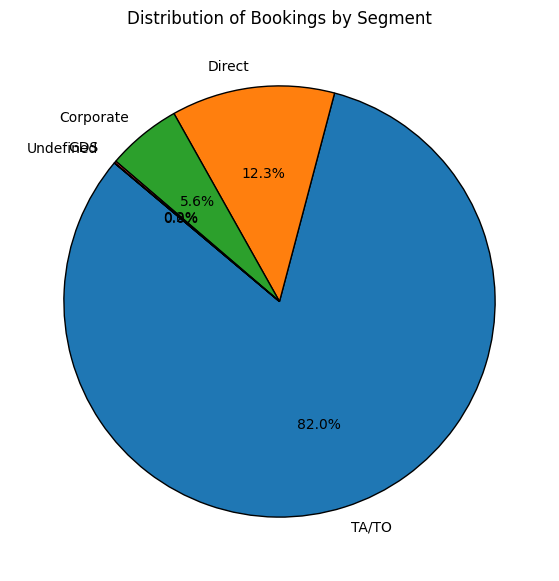

In [15]:
import matplotlib.pyplot as plt

# Labels and sizes for the pie chart
labels = booking_counts.index
sizes = booking_counts.values
colors = plt.get_cmap('tab10').colors  # Choose a color map

# Plotting the pie chart
plt.figure(figsize=(10, 7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})

# Add a title
plt.title('Distribution of Bookings by Segment')

# Display of the pie chart
plt.show()


In [16]:
# Calculating the number of bookings by hotel
hotel_booking_counts = hotel_bookings['hotel'].value_counts()

# Display of the counts for verification
print(hotel_booking_counts)


hotel
City Hotel      79163
Resort Hotel    40047
Name: count, dtype: int64


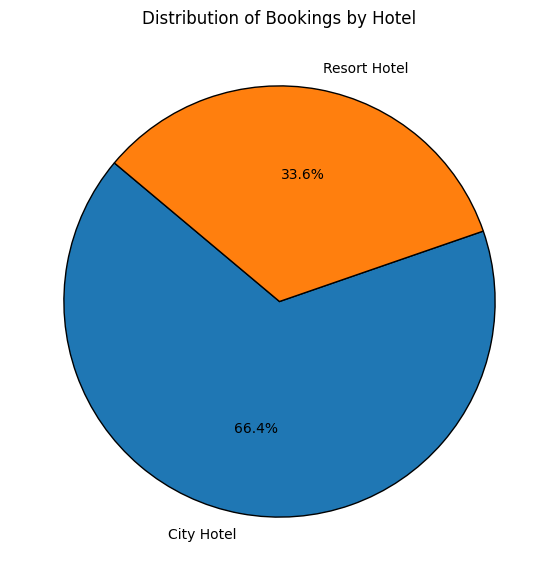

In [17]:
import matplotlib.pyplot as plt

# Defining the labels and sizes for the pie chart
labels = hotel_booking_counts.index
sizes = hotel_booking_counts.values
colors = plt.get_cmap('tab10').colors  # Choose a color map

# Plotting the pie chart
plt.figure(figsize=(10, 7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})

# Title
plt.title('Distribution of Bookings by Hotel')

# Display of the pie chart
plt.show()


In [18]:
# Calculating the total number of bookings by hotel
total_bookings_by_hotel = hotel_bookings['hotel'].value_counts()

# Calculating the number of canceled bookings by hotel
canceled_bookings_by_hotel = hotel_bookings[hotel_bookings['reservation_status'] == 'Canceled']['hotel'].value_counts()

# Calculating the percentage of canceled bookings by hotel
percentage_canceled_by_hotel = (canceled_bookings_by_hotel / total_bookings_by_hotel) * 100

# Display of the percentages for verification
print(percentage_canceled_by_hotel)


hotel
City Hotel      40.630092
Resort Hotel    27.040727
Name: count, dtype: float64


In [19]:
# Calculating the number of cancellations by hotel
cancellations_by_hotel = hotel_bookings[hotel_bookings['is_canceled'] == 1]['hotel'].value_counts()

# Calculating the total number of bookings by hotel
total_bookings_by_hotel = hotel_bookings['hotel'].value_counts()

# Calculating the percentage of cancellations
cancellation_percentage_by_hotel = (cancellations_by_hotel / total_bookings_by_hotel) * 100

# Combining the results into a DataFrame for easier handling
cancellation_stats = pd.DataFrame({
    'Number of Cancellations': cancellations_by_hotel,
    'Total Bookings': total_bookings_by_hotel,
    'Cancellation Percentage': cancellation_percentage_by_hotel
})

# Display the DataFrame
print(cancellation_stats)


              Number of Cancellations  Total Bookings  Cancellation Percentage
hotel                                                                         
City Hotel                      33079           79163                41.785935
Resort Hotel                    11120           40047                27.767373


In [20]:
# Calculating the number of cancellations and total bookings by deposit type
cancellations_by_deposit = hotel_bookings[hotel_bookings['is_canceled'] == 1]['deposit_type'].value_counts()

# Combining results into a DataFrame for easier plotting
cancellation_stats_by_deposit = pd.DataFrame({
    'Number of Cancellations': cancellations_by_deposit,
})

# Display of the DataFrame
print(cancellation_stats_by_deposit)


              Number of Cancellations
deposit_type                         
No Deposit                      29669
Non Refund                      14494
Refundable                         36


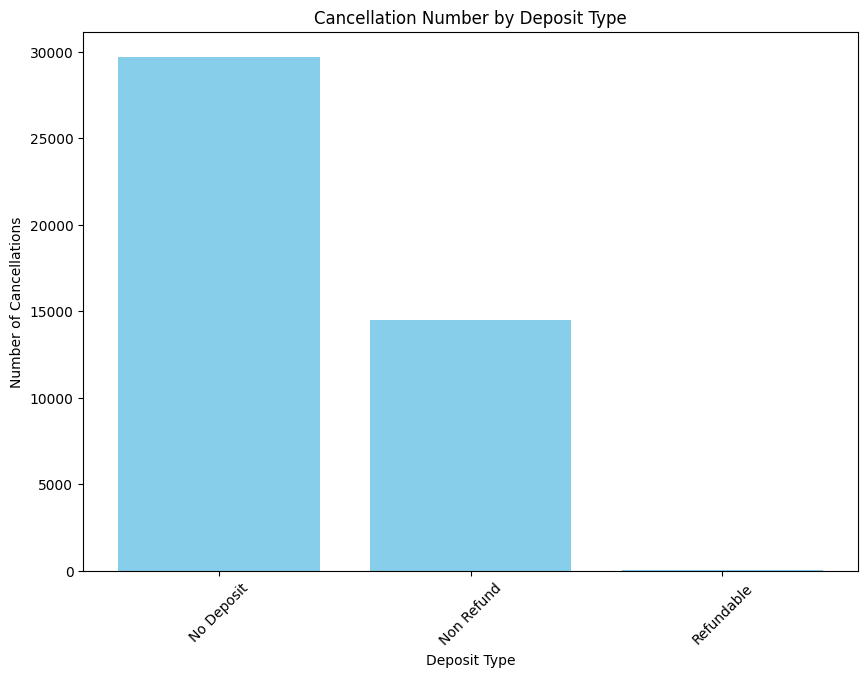

In [21]:
import matplotlib.pyplot as plt

# Plotting the bar graph for cancellation percentages by deposit type
plt.figure(figsize=(10, 7))
plt.bar(cancellation_stats_by_deposit.index, cancellation_stats_by_deposit['Number of Cancellations'], color='skyblue')

# Adding labels and title
plt.xlabel('Deposit Type')
plt.ylabel('Number of Cancellations')
plt.title('Cancellation Number by Deposit Type')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Display of the bar graph
plt.show()

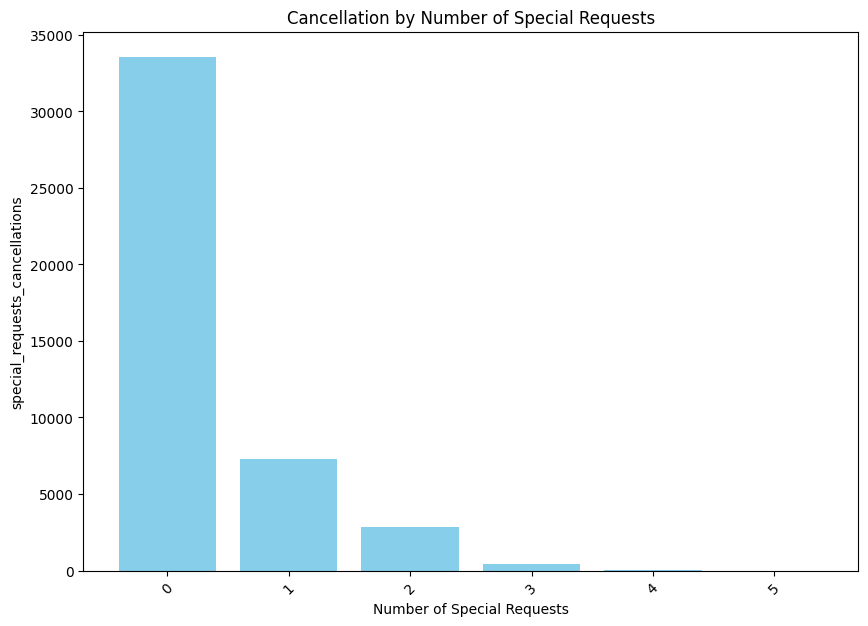

In [22]:
import matplotlib.pyplot as plt

# Calculating the number of cancellations and total bookings based on special requests
special_requests_cancellations = hotel_bookings[hotel_bookings['is_canceled'] == 1]['total_of_special_requests'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(10, 7))
plt.bar(special_requests_cancellations.index, special_requests_cancellations, color='skyblue')

# Adding labels and title
plt.xlabel('Number of Special Requests')
plt.ylabel('special_requests_cancellations')
plt.title('Cancellation by Number of Special Requests')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Display of the bar graph
plt.show()


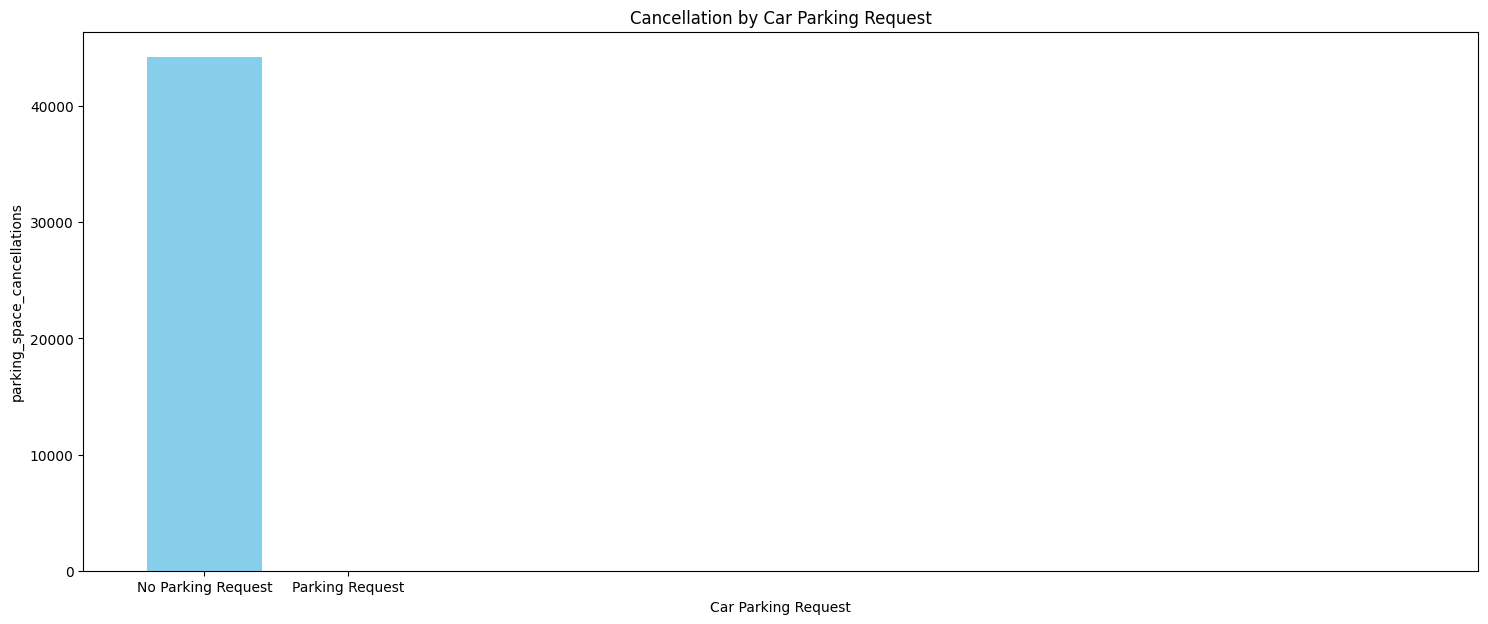

In [23]:
# Calculating the number of cancellations and total bookings by car parking request
parking_space_cancellations = hotel_bookings[hotel_bookings['is_canceled'] == 1]['required_car_parking_spaces'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(18,7))
plt.bar(parking_space_cancellations.index, parking_space_cancellations, color='skyblue')

# Adding labels and title
plt.xlabel('Car Parking Request')
plt.ylabel('parking_space_cancellations')
plt.title('Cancellation by Car Parking Request')
plt.xticks([0, 1], ['No Parking Request', 'Parking Request'])  # Custom x-axis labels

# Display of the bar graph
plt.show()


In [24]:
import pandas as pd

# Selecting the features
selected_features = hotel_bookings[['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number',	'arrival_date_day_of_month', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list',	'adr', 'day_of_leaving', 'total_night_stays']]

# Calculating the correlation matrix
correlation_matrix = selected_features.corr()

# Display of the correlation matrix
print(correlation_matrix)


                                is_canceled  lead_time  arrival_date_year  \
is_canceled                        1.000000   0.292876           0.016622   
lead_time                          0.292876   1.000000           0.040334   
arrival_date_year                  0.016622   0.040334           1.000000   
arrival_date_week_number           0.008315   0.127046          -0.540373   
arrival_date_day_of_month         -0.005948   0.002306          -0.000121   
adults                             0.058182   0.117575           0.030266   
children                           0.004851  -0.037878           0.054710   
babies                            -0.032569  -0.021003          -0.013192   
previous_cancellations             0.110139   0.086025          -0.119905   
previous_bookings_not_canceled    -0.057365  -0.073599           0.029234   
booking_changes                   -0.144832   0.002230           0.031416   
agent                             -0.083389  -0.070072           0.063408   

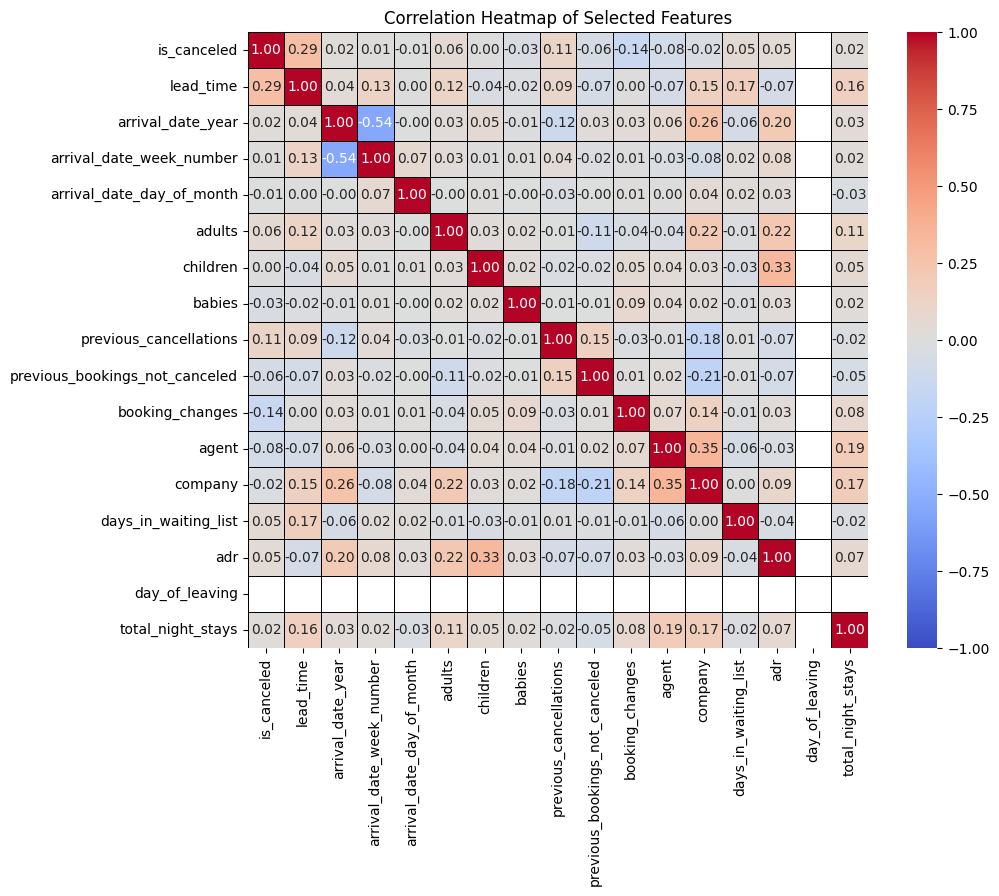

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, center=0, linewidths=0.5, linecolor='black')

# Title
plt.title('Correlation Heatmap of Selected Features')

# Display the heatmap
plt.show()


In [26]:
!pip install pyspark


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.2-py2.py3-none-any.whl size=317812365 sha256=047d8f21df0637bef42de8f875a54db1d20ae361e55b5c0740cbbc02a5ba3cee
  Stored in directory: /root/.cache/pip/wheels/34/34/bd/03944534c44b677cd5859f248090daa9fb27b3c8f8e5f49574
Successfully built pyspark


In [27]:
import pandas as pd
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder.appName("CramersV").getOrCreate()

# Example pandas DataFrame (replace with your actual data)
pandas_df = pd.read_csv("/content/hotel_bookings.csv")

# Convert pandas DataFrame to PySpark DataFrame
hotel_bookings = spark.createDataFrame(pandas_df)


In [28]:
from pyspark.sql.functions import col

# Create the total_night_stays column in PySpark DataFrame
hotel_bookings = hotel_bookings.withColumn('total_night_stays',
                                           col('stays_in_week_nights').cast('int') + col('stays_in_weekend_nights').cast('int'))


In [29]:
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.stat import ChiSquareTest
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import numpy as np
import pandas as pd

# Initialize Spark session
spark = SparkSession.builder.appName("CramersV").getOrCreate()

# Example pandas DataFrame (replace with your actual data)
pandas_df = pd.read_csv("/content/hotel_bookings.csv")

# Convert pandas DataFrame to PySpark DataFrame
hotel_bookings = spark.createDataFrame(pandas_df)

# Create the total_night_stays column in the PySpark DataFrame
hotel_bookings = hotel_bookings.withColumn(
    'total_night_stays',
    col('stays_in_week_nights').cast('int') + col('stays_in_weekend_nights').cast('int')
)

# Fill missing values in all string columns with 'Unknown'
string_columns = [col for col, dtype in hotel_bookings.dtypes if dtype == 'string']
hotel_bookings = hotel_bookings.fillna('Unknown', subset=string_columns)

# Initialize dictionary to store Cramer's V scores
cramers = {}

# List of categorical features to test
categorical_features = ['adults', 'children', 'deposit_type', 'hotel', 'country', 'previous_cancellations', 'market_segment',
                        'total_of_special_requests', 'required_car_parking_spaces', 'booking_changes', 'distribution_channel',
                        'days_in_waiting_list', 'total_night_stays', 'company', 'customer_type', 'stays_in_week_nights',
                        'arrival_date_week_number', 'is_repeated_guest', 'reserved_room_type', 'arrival_date_month', 'meal',
                        'babies', 'stays_in_weekend_nights']

# Loop through each feature and calculate Cramer's V
for feature in categorical_features:
    # Index and assemble the feature
    indexer = StringIndexer(inputCol=feature, outputCol=feature + "Index", handleInvalid='keep')
    assembler = VectorAssembler(inputCols=[feature + "Index"], outputCol=feature + "Vector")
    pipeline = Pipeline(stages=[indexer, assembler])
    transformed_data = pipeline.fit(hotel_bookings).transform(hotel_bookings)

    # Perform Chi-Square test
    r = ChiSquareTest.test(transformed_data, feature + "Vector", "is_canceled").head()

    # Calculate Cramer's V
    p_values = r.pValues
    degrees_of_freedom = r.degreesOfFreedom
    statistics = r.statistics

    # Cramer's V calculation
    cramers[feature] = float(np.sqrt(statistics[0] / transformed_data.count()))

    print(f"Feature: {feature}")
    print(f"pValues: {p_values}")
    print(f"degreesOfFreedom: {degrees_of_freedom}")
    print(f"statistics: {statistics}")
    print(f"Cramer's V: {cramers[feature]}")


Feature: adults
pValues: [0.0]
degreesOfFreedom: [13]
statistics: [902.5933136266608]
Cramer's V: 0.08694849714686856
Feature: children
pValues: [0.0]
degreesOfFreedom: [5]
statistics: [105.36433222413113]
Cramer's V: 0.02970727615707154
Feature: deposit_type
pValues: [0.0]
degreesOfFreedom: [2]
statistics: [27677.32924132434]
Cramer's V: 0.48147984706556696
Feature: hotel
pValues: [0.0]
degreesOfFreedom: [1]
statistics: [2225.523625474075]
Cramer's V: 0.13653126949161254
Feature: country
pValues: [0.0]
degreesOfFreedom: [177]
statistics: [15565.21990631606]
Cramer's V: 0.36107186925555834
Feature: previous_cancellations
pValues: [0.0]
degreesOfFreedom: [14]
statistics: [9274.833707930891]
Cramer's V: 0.278720613818404
Feature: market_segment
pValues: [0.0]
degreesOfFreedom: [7]
statistics: [8497.224089832987]
Cramer's V: 0.26678079336123384
Feature: total_of_special_requests
pValues: [0.0]
degreesOfFreedom: [5]
statistics: [8406.499740187332]
Cramer's V: 0.2653527701742407
Feature: re

In [30]:
# Sort features by Cramer's V score in descending order
sorted_features = sorted(cramers.items(), key=lambda x: x[1], reverse=True)

# Display sorted features
print("Top features based on Cramer's V score:")
for feature, score in sorted_features:
    print(f"{feature}: {score}")


Top features based on Cramer's V score:
deposit_type: 0.48147984706556696
country: 0.36107186925555834
previous_cancellations: 0.278720613818404
market_segment: 0.26678079336123384
total_of_special_requests: 0.2653527701742407
required_car_parking_spaces: 0.1973988213113353
booking_changes: 0.18809031868343198
distribution_channel: 0.1771283087384011
days_in_waiting_list: 0.1631655286624585
total_night_stays: 0.1514202341741529
company: 0.14122042983545902
hotel: 0.13653126949161254
customer_type: 0.1364386190905123
stays_in_week_nights: 0.11941423924703991
arrival_date_week_number: 0.09731188463174831
adults: 0.08694849714686856
is_repeated_guest: 0.08479341835708806
reserved_room_type: 0.07366280635724438
arrival_date_month: 0.07021986659432775
meal: 0.05048024467506253
babies: 0.034358882764762046
stays_in_weekend_nights: 0.03017622568183398
children: 0.02970727615707154


Models and Pipelines

In [31]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.classification import GBTClassifier, DecisionTreeClassifier, RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator

# Initialize Spark session
spark = SparkSession.builder.appName("Hotel Booking Cancellations").getOrCreate()

# Load dataset
pandas_df = pd.read_csv("/content/hotel_bookings.csv")
hotel_bookings = spark.createDataFrame(pandas_df)

# Create the total_night_stays column in the PySpark DataFrame
from pyspark.sql.functions import col
hotel_bookings = hotel_bookings.withColumn(
    'total_night_stays',
    col('stays_in_week_nights').cast('int') + col('stays_in_weekend_nights').cast('int')
)

# Fill missing values in all string columns with 'Unknown'
string_columns = [col for col, dtype in hotel_bookings.dtypes if dtype == 'string']
hotel_bookings = hotel_bookings.fillna('Unknown', subset=string_columns)


In [32]:
# Defining Top 6 categorical features
categoricalColumns = ["deposit_type", "agent", "country", "previous_cancellations", "market_segment", "total_of_special_requests"]

# Defining stages of the pipeline for categorical columns
stages = []
for categoricalCol in categoricalColumns:
    stringIndexer = StringIndexer(inputCol=categoricalCol, outputCol=categoricalCol + "Index", handleInvalid="keep")
    encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classEncoder"])
    stages += [stringIndexer, encoder]

# Indexing the target variable column 'is_canceled'
label_stringIndx = StringIndexer(inputCol="is_canceled", outputCol="label", handleInvalid="keep")
stages += [label_stringIndx]

# Vectorizing all the categorical columns
Vector_Assembler = VectorAssembler(inputCols=[
    'deposit_typeclassEncoder', 'agentclassEncoder', 'countryclassEncoder',
    'previous_cancellationsclassEncoder', 'market_segmentclassEncoder', 'total_of_special_requestsclassEncoder'
], outputCol='features')
stages += [Vector_Assembler]

In [33]:
# Fitting all the above defined stages to the dataframe
partial_Pipeline = Pipeline().setStages(stages)
pipeline_Model = partial_Pipeline.fit(hotel_bookings)
prepped_DF = pipeline_Model.transform(hotel_bookings)

In [34]:
# Defining train and test datasets with equal proportions of target variable
zeros = prepped_DF.filter(prepped_DF["is_canceled"] == 0)
ones = prepped_DF.filter(prepped_DF["is_canceled"] == 1)

# Split datasets into training and testing
train0, test0 = zeros.randomSplit([0.8, 0.2], seed=1234)
train1, test1 = ones.randomSplit([0.8, 0.2], seed=1234)

# Combine datasets back together
train = train0.union(train1)
test = test0.union(test1)


In [35]:
# Initialize classifiers
gbt = GBTClassifier(labelCol="label", featuresCol="features", maxIter=10)
dt = DecisionTreeClassifier(labelCol="label", featuresCol="features")
rf = RandomForestClassifier(labelCol="label", featuresCol="features", numTrees=10)

# Train the models
gbt_model = gbt.fit(train)
dt_model = dt.fit(train)
rf_model = rf.fit(train)

# Make predictions
gbt_predictions = gbt_model.transform(test)
dt_predictions = dt_model.transform(test)
rf_predictions = rf_model.transform(test)


In [36]:
binary_evaluator = BinaryClassificationEvaluator(labelCol="is_canceled", rawPredictionCol="rawPrediction")

# Accuracy
accuracy_gbt = gbt_predictions.filter(gbt_predictions.is_canceled == gbt_predictions.prediction).count() / float(gbt_predictions.count())
# ROC AUC
roc_auc_gbt = binary_evaluator.evaluate(gbt_predictions, {binary_evaluator.metricName: "areaUnderROC"})
# PR AUC
pr_auc_gbt = binary_evaluator.evaluate(gbt_predictions, {binary_evaluator.metricName: "areaUnderPR"})

# Precision and Recall
precision_gbt = gbt_predictions.filter((gbt_predictions.is_canceled == 1) & (gbt_predictions.prediction == 1)).count() / float(gbt_predictions.filter(gbt_predictions.prediction == 1).count())
recall_gbt = gbt_predictions.filter((gbt_predictions.is_canceled == 1) & (gbt_predictions.prediction == 1)).count() / float(gbt_predictions.filter(gbt_predictions.is_canceled == 1).count())
f1_gbt = 2 * (precision_gbt * recall_gbt) / (precision_gbt + recall_gbt)

print(f"GBT - Accuracy: {accuracy_gbt:.4f}, F1 Score: {f1_gbt:.4f}, Precision: {precision_gbt:.4f}, Recall: {recall_gbt:.4f}, ROC AUC: {roc_auc_gbt:.4f}, PR AUC: {pr_auc_gbt:.4f}")


GBT - Accuracy: 0.8040, F1 Score: 0.6928, Precision: 0.8223, Recall: 0.5986, ROC AUC: 0.8805, PR AUC: 0.8425


In [37]:
# Evaluate the model using MulticlassClassificationEvaluator
multiclass_evaluator = MulticlassClassificationEvaluator(labelCol="is_canceled", predictionCol="prediction")

# Calculate accuracy
accuracy_dt = multiclass_evaluator.evaluate(dt_predictions, {multiclass_evaluator.metricName: "accuracy"})

# Calculate F1 score
f1_dt = multiclass_evaluator.evaluate(dt_predictions, {multiclass_evaluator.metricName: "f1"})

# Calculate precision
precision_dt = multiclass_evaluator.evaluate(dt_predictions, {multiclass_evaluator.metricName: "weightedPrecision"})

# Calculate recall
recall_dt = multiclass_evaluator.evaluate(dt_predictions, {multiclass_evaluator.metricName: "weightedRecall"})

print(f"Decision Tree - Accuracy: {accuracy_dt:.4f}, F1 Score: {f1_dt:.4f}, Precision: {precision_dt:.4f}, Recall: {recall_dt:.4f}")

Decision Tree - Accuracy: 0.7974, F1 Score: 0.7858, Precision: 0.8048, Recall: 0.7974


In [38]:
# Evaluate the model using MulticlassClassificationEvaluator
multiclass_evaluator = MulticlassClassificationEvaluator(labelCol="is_canceled", predictionCol="prediction")

# Calculate accuracy
accuracy_rf = multiclass_evaluator.evaluate(rf_predictions, {multiclass_evaluator.metricName: "accuracy"})

# Calculate F1 score
f1_rf = multiclass_evaluator.evaluate(rf_predictions, {multiclass_evaluator.metricName: "f1"})

# Calculate precision
precision_rf = multiclass_evaluator.evaluate(rf_predictions, {multiclass_evaluator.metricName: "weightedPrecision"})

# Calculate recall
recall_rf = multiclass_evaluator.evaluate(rf_predictions, {multiclass_evaluator.metricName: "weightedRecall"})

print(f"Random Forest - Accuracy: {accuracy_rf:.4f}, F1 Score: {f1_rf:.4f}, Precision: {precision_rf:.4f}, Recall: {recall_rf:.4f}")

Random Forest - Accuracy: 0.7530, F1 Score: 0.7122, Precision: 0.8179, Recall: 0.7530


In [39]:
from pyspark.ml.classification import LinearSVC

# Define the Linear SVM model
lsvc = LinearSVC(labelCol="is_canceled", featuresCol="features", maxIter=10)

# Train the Linear SVM model
lsvc_model = lsvc.fit(train)

# Make predictions
lsvc_predictions = lsvc_model.transform(test)

# Evaluate the model
accuracy_lsvc = multiclass_evaluator.evaluate(lsvc_predictions, {multiclass_evaluator.metricName: "accuracy"})
f1_lsvc = multiclass_evaluator.evaluate(lsvc_predictions, {multiclass_evaluator.metricName: "f1"})

print(f"Linear SVM - Accuracy: {accuracy_lsvc:.4f}, F1 Score: {f1_lsvc:.4f}")


Linear SVM - Accuracy: 0.8057, F1 Score: 0.7994


In [40]:
from pyspark.ml.classification import NaiveBayes

# Define the Naive Bayes model
nb = NaiveBayes(labelCol="is_canceled", featuresCol="features")

# Train the model
nb_model = nb.fit(train)

# Make predictions
nb_predictions = nb_model.transform(test)

# Evaluate the model using MulticlassClassificationEvaluator
accuracy_nb = multiclass_evaluator.evaluate(nb_predictions, {multiclass_evaluator.metricName: "accuracy"})
f1_nb = multiclass_evaluator.evaluate(nb_predictions, {multiclass_evaluator.metricName: "f1"})
precision_nb = multiclass_evaluator.evaluate(nb_predictions, {multiclass_evaluator.metricName: "weightedPrecision"})
recall_nb = multiclass_evaluator.evaluate(nb_predictions, {multiclass_evaluator.metricName: "weightedRecall"})

print(f"Naive Bayes - Accuracy: {accuracy_nb:.4f}, F1 Score: {f1_nb:.4f}, Precision: {precision_nb:.4f}, Recall: {recall_nb:.4f}")


Naive Bayes - Accuracy: 0.7520, F1 Score: 0.7368, Precision: 0.7525, Recall: 0.7520


In [41]:
from pyspark.ml.classification import LinearSVC

# Define the Linear SVC model
svm = LinearSVC(labelCol="is_canceled", featuresCol="features", maxIter=10)

# Train the model
svm_model = svm.fit(train)

# Make predictions
svm_predictions = svm_model.transform(test)

# Evaluate the model using MulticlassClassificationEvaluator
accuracy_svm = multiclass_evaluator.evaluate(svm_predictions, {multiclass_evaluator.metricName: "accuracy"})
f1_svm = multiclass_evaluator.evaluate(svm_predictions, {multiclass_evaluator.metricName: "f1"})
precision_svm = multiclass_evaluator.evaluate(svm_predictions, {multiclass_evaluator.metricName: "weightedPrecision"})
recall_svm = multiclass_evaluator.evaluate(svm_predictions, {multiclass_evaluator.metricName: "weightedRecall"})

print(f"SVM - Accuracy: {accuracy_svm:.4f}, F1 Score: {f1_svm:.4f}, Precision: {precision_svm:.4f}, Recall: {recall_svm:.4f}")


SVM - Accuracy: 0.8057, F1 Score: 0.7994, Precision: 0.8057, Recall: 0.8057
